
## Project description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Objective

Aanalyze Zuber's competition, and test hypothesis about impact of weather or ride frequency.


#### Load the 3 dataframe

Dataframe 1:

- company_name: taxi company name

- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

Dataframe 2:

- dropoff_location_name: Chicago neighborhoods where rides ended

- average_trips: the average number of rides that ended in each neighborhood in November 2017.

Dataframe 3: It contains data on rides from the Loop to O'Hare International Airport. 
- start_ts: pickup date and time
    
- weather_conditions: weather conditions at the moment the ride started
    
- duration_seconds: ride duration in seconds


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the CSV files into DataFrames
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df2 = pd.read_csv('/datasets/project_sql_result_04.csv')
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')

# Display the first few rows of each DataFrame
print("DataFrame 1 - Company Rides:")
print(df1.head(), "\n")

print("DataFrame 2 - Neighborhood Drop-offs:")
print(df2.head(), "\n")

print("DataFrame 3 - Loop to O'Hare Rides:")
print(df3.head())


DataFrame 1 - Company Rides:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299 

DataFrame 2 - Neighborhood Drop-offs:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000 

DataFrame 3 - Loop to O'Hare Rides:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


#### Data Type Verification and Cleaning

In [2]:
# Check data types
print("DataFrame 1 Types:")
print(df1.dtypes, "\n")

print("DataFrame 2 Types:")
print(df2.dtypes, "\n")

print("DataFrame 3 Types:")
print(df3.dtypes, "\n")

# Convert data types if necessary
df1['trips_amount'] = pd.to_numeric(df1['trips_amount'], errors='coerce')
df2['average_trips'] = pd.to_numeric(df2['average_trips'], errors='coerce')
df3['start_ts'] = pd.to_datetime(df3['start_ts'])
df3['duration_seconds'] = pd.to_numeric(df3['duration_seconds'], errors='coerce')

# Verify data types after conversion
print("\nData Types After Conversion:")
print(df1.dtypes, df2.dtypes, df3.dtypes)


DataFrame 1 Types:
company_name    object
trips_amount     int64
dtype: object 

DataFrame 2 Types:
dropoff_location_name     object
average_trips            float64
dtype: object 

DataFrame 3 Types:
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object 


Data Types After Conversion:
company_name    object
trips_amount     int64
dtype: object dropoff_location_name     object
average_trips            float64
dtype: object start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


#### Top 10 Neighborhoods by Drop-offs


In [3]:
# Sort and identify the top 10 neighborhoods
top_10_neighborhoods = df2.sort_values(by='average_trips', ascending=False).head(10)

# Display the top 10 neighborhoods
print("Top 10 Neighborhoods by Drop-offs:")
display(top_10_neighborhoods)


Top 10 Neighborhoods by Drop-offs:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### Data Visualizations

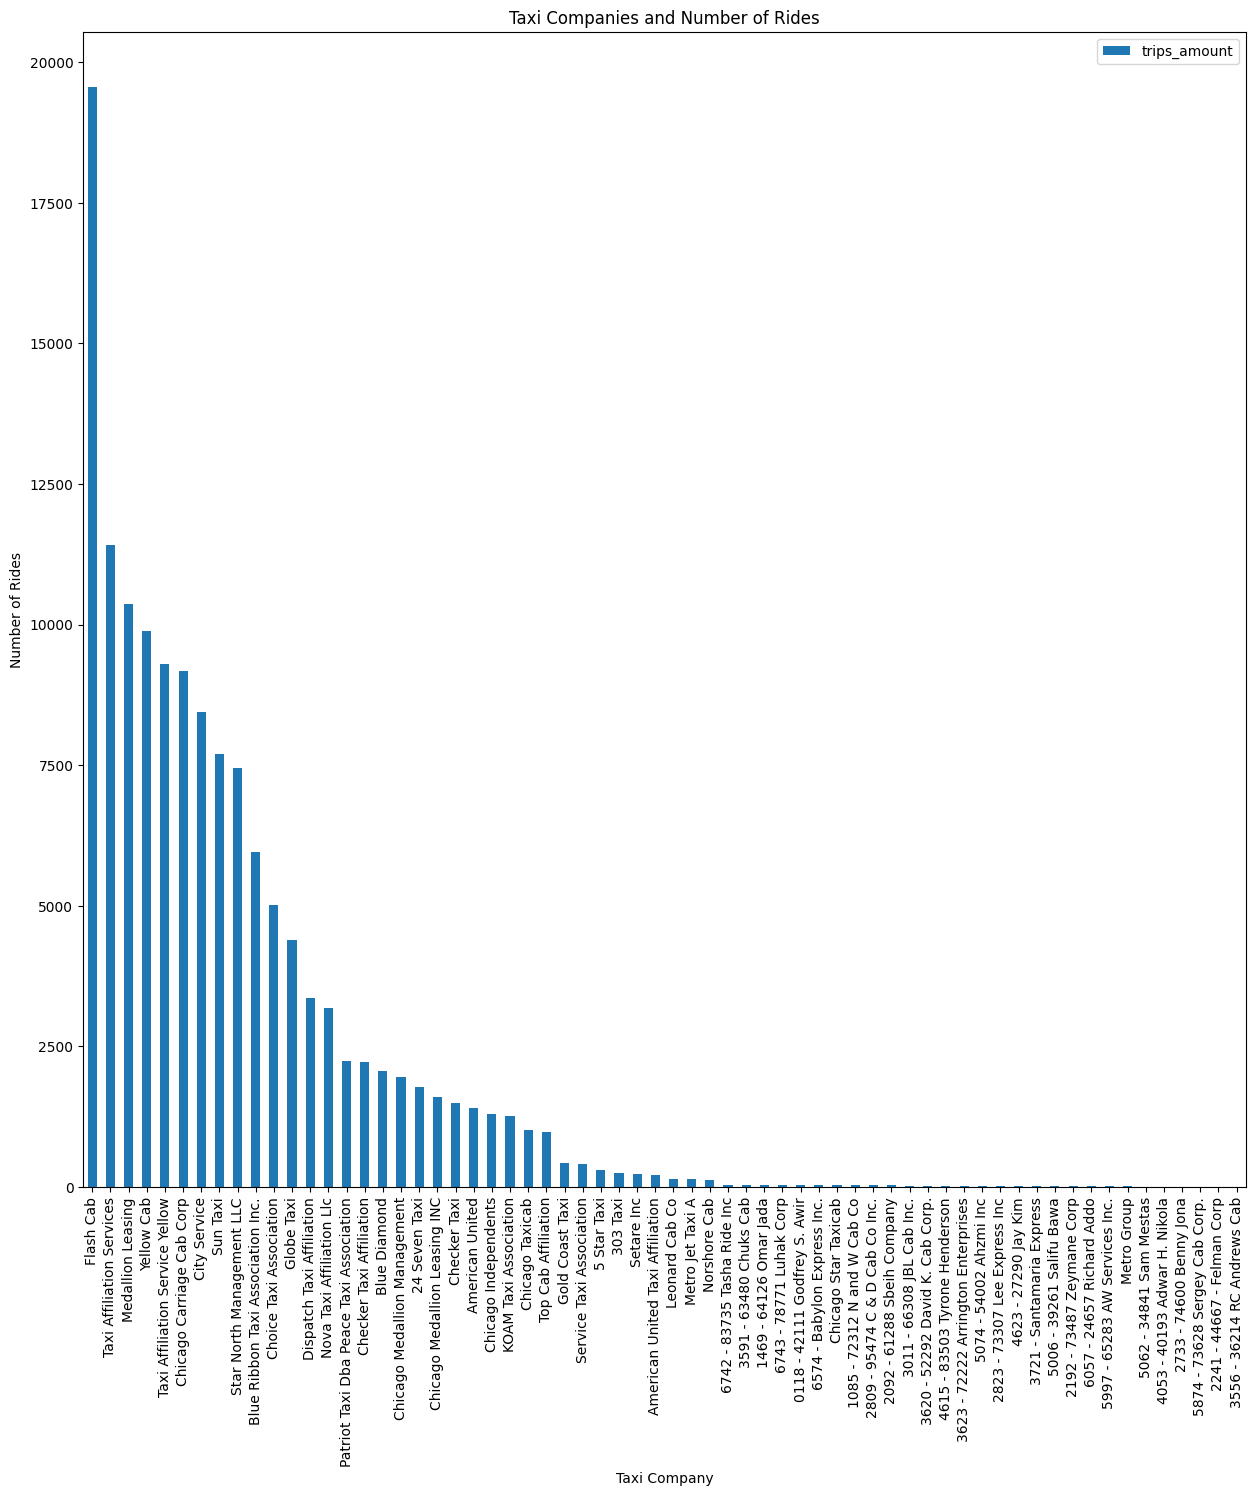

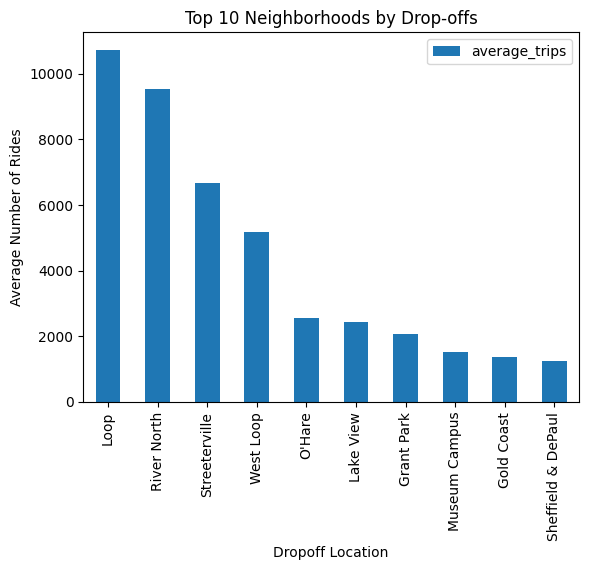

In [4]:
# Plot taxi companies and number of rides
df1.plot(kind='bar', x='company_name', y='trips_amount', figsize=(15,15), title='Taxi Companies and Number of Rides')
plt.ylabel('Number of Rides')
plt.xlabel('Taxi Company')
plt.show()

# Plot top 10 neighborhoods by drop-offs
top_10_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', title='Top 10 Neighborhoods by Drop-offs')
plt.ylabel('Average Number of Rides')
plt.xlabel('Dropoff Location')
plt.show()


#### Graph Observations

Top 10 Neighborhoods by Drop-offs:

- The Loop is the most popular drop-off neighborhood, with over 10,000 rides on average.
- River North and Streeterville also see high numbers of drop-offs, both above 7,000 rides.
- Other neighborhoods like West Loop, O'Hare, and Lake View have fewer average rides, ranging from around 4,000 to 6,000.

Taxi Companies and Number of Rides:

- Flash Cab again leads by a wide margin with nearly 20,000 rides.
- The top 10 companies collectively manage a significant proportion of all rides.
- After the top 3-4 companies, there is a steady decline in the number of rides, with the 10th company handling less than half of what Flash Cab manages.

**Observation**
- The data indicates that the taxi industry in the analyzed region is concentrated among a few key players, both in terms of neighborhood popularity and the companies that dominate the number of rides.
- The Loop is the central hub for taxi drop-offs, highlighting its importance in the city's transportation network.
- There is a significant drop in taxi activity as you move away from the top neighborhoods and companies, indicating a possible reliance on a few key areas and service providers.

#### Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

- Null Hypothesis (H₀): The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

- Alternative Hypothesis (H₁): The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

- We’ll use a two-sample t-test to compare the average ride durations between rainy and non-rainy Saturdays.

In [5]:
# Convert duration to minutes for better readability
df3['duration_minutes'] = df3['duration_seconds'] / 60

# Separate data by weather conditions
rainy_saturdays = df3[df3['weather_conditions'] == 'Bad']
dry_saturdays = df3[df3['weather_conditions'] == 'Good']

# Perform the t-test
t_stat, p_value = ttest_ind(rainy_saturdays['duration_minutes'], dry_saturdays['duration_minutes'], equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: The duration of rides changes on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: No significant change in ride duration on rainy Saturdays.")


T-statistic: 7.1860342880686225, P-value: 6.738994326109027e-12
Reject the null hypothesis: The duration of rides changes on rainy Saturdays.


**Results:**

- T-statistic: 7.186
- P-value: 6.739e-12

<p>Given the extremely low P-value, which is much smaller than any common significance level (e.g., 0.05), we reject the null hypothesis. This means that there is strong evidence to suggest that the duration of rides from the Loop to O'Hare International Airport does indeed change on rainy Saturdays.</p>

**Conclusion:**

<p>The hypothesis test indicates that weather, particularly rain on Saturdays, has a statistically significant impact on the duration of rides from the Loop to O'Hare International Airport. This finding suggests that rainy conditions likely lead to longer travel times, possibly due to factors like slower traffic or increased caution by drivers. This insight could be crucial for Zuber's operational planning, especially in forecasting ride durations and managing customer expectations during inclement weather.</p>